# Diffuse models

## Lambertian reflectance

Lamertian reflectance is the property that that defines an ideal "matte", or diffusely reflecting surface. Lambertian reflectance us usually used as a model for diffuse reflection. The region will will change the way it reflects light if it is tilted away from its initial normal vector because the area is illuminated by a smaller fraction of the incident radiation.

![Lambertian model](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Oswietlenie_lamberta.svg/220px-Oswietlenie_lamberta.svg.png)

The reflection is calculated by taking the dot-product of the normal vector $\mathbf{N}$, and the normalized light-direction vector $\mathbf{L}$, pointing from the surface to the light source. This is then multiplied by the color of the light $\mathbf{C}$, and the intensity of the incoming light hitting the surface $I_L$.

$$\mathbf{L}_D = (\mathbf{N}\cdot\mathbf{L})\mathbf{C}I_L$$

Because $\mathbf{L}\cdot\mathbf{N} = \cos\alpha$, where $\alpha$ is the angle between the directions of the two vectors, the intensity will be the highest if the normal vector points in the same direction as the light direction vector ($\cos 0 = 1$), and the lowest if the normal vector is perpendicular to the light source ($\cos( \pi\ /\ 2) = 0$).

In [8]:
%pylab inline
font = {'size': 16}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Lambertian reflectance $(I_L\\cdot\\cos\\ \\alpha)$')

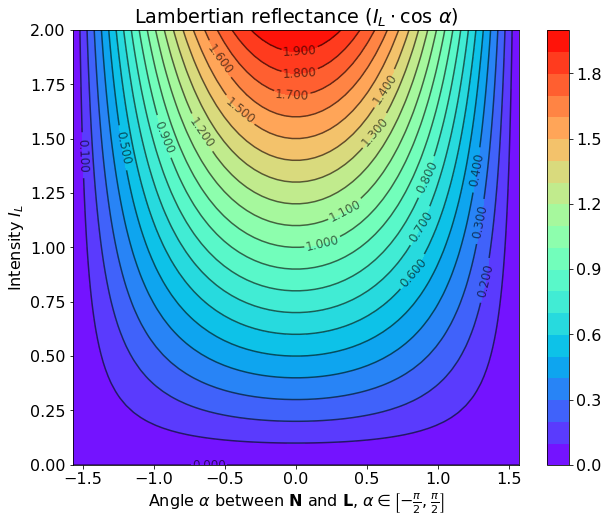

In [9]:
x = np.linspace(-math.pi/2, math.pi/2, 60)
y = np.linspace(0, 2, 60)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * Y
plt.figure(figsize=(10, 8))
levels = 20
contours = plt.contour(X, Y, Z, colors='black', levels=levels, alpha=0.6)
plt.clabel(contours, inline=True, fontsize=12, colors='black')
plt.contourf(X, Y, Z, cmap='rainbow', levels=levels)
plt.colorbar()
plt.xlabel('Angle $\\alpha$ between $\\mathbf{N}$ and $\\mathbf{L}$, $\\alpha \\in \\left[-\\frac{\\pi}{2}, \\frac{\\pi}{2}\\right]$')
plt.ylabel('Intensity $I_L$')
plt.title('Lambertian reflectance $(I_L\\cdot\\cos\ \\alpha)$')

## Oren-Nayar

https://en.wikipedia.org/wiki/Oren%E2%80%93Nayar_reflectance_model

# Specular highlight models

https://en.wikipedia.org/wiki/Specular_highlight

## Phong distribution

In the Phong reflectance model, the intensity of the specular highlight is calculated as:

$$k_{\textrm{spec}} = ||\ \mathbf{R}\ ||\ ||\ \mathbf{V}\ ||\ \cos^n \beta = (\mathbf{\hat{R}}\cdot\mathbf{\hat{V}})^n $$.

Text(0.5, 1.0, 'Phong distribution ($\\cos^n\\beta$)')

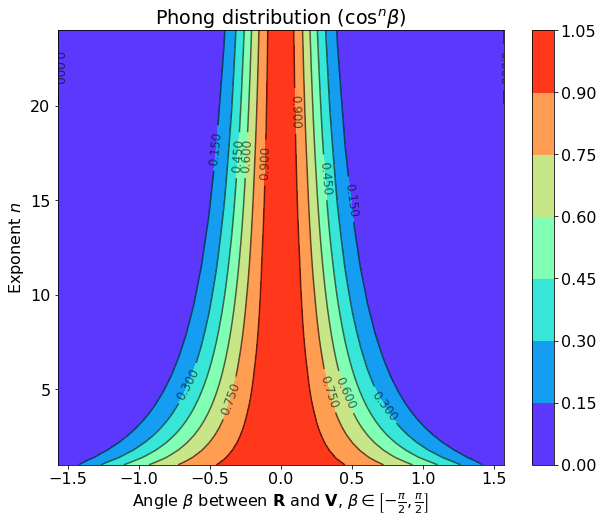

In [4]:
x = np.linspace(-math.pi/2, math.pi/2, 60)
y = np.linspace(1, 24, 60)
X, Y = np.meshgrid(x, y)
Z = np.cos(X)**Y
plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, colors='black', levels=6, alpha=0.6)
plt.clabel(contours, inline=True, fontsize=12, colors='black')
plt.contourf(X, Y, Z, cmap='rainbow', levels=8)
plt.colorbar()
plt.xlabel('Angle $\\beta$ between $\\mathbf{R}$ and $\\mathbf{V}$, $\\beta \\in \\left[-\\frac{\\pi}{2}, \\frac{\\pi}{2}\\right]$')
plt.ylabel('Exponent $n$')
plt.title('Phong distribution ($\\cos^n\\beta$)')

## Gaussian distribution

A slightly better model of microfacet distribution can be created using a Gaussian distribution. The usual function calculates specular highlight intensity as:

$$ k_\textrm{spec} = \exp\left[-\left(\dfrac{\mathbf{N}\cdot\mathbf{H}}{m}\right)^2\right] $$

where $m$ is a constant between $[0, 1]$ that controls the apparent smoothness of the surface.

<ipython-input-5-84d5961e5388>:6: RuntimeWarning: divide by zero encountered in true_divide
  Z = np.exp(-(X/Y)**2)


Text(0.5, 1.0, 'Gaussian distribution $\\left( \\exp\\left[-\\left(\\mathbf{N}\\cdot\\mathbf{H}\\ /\\ m\\right)^2\\right] \\right)$')

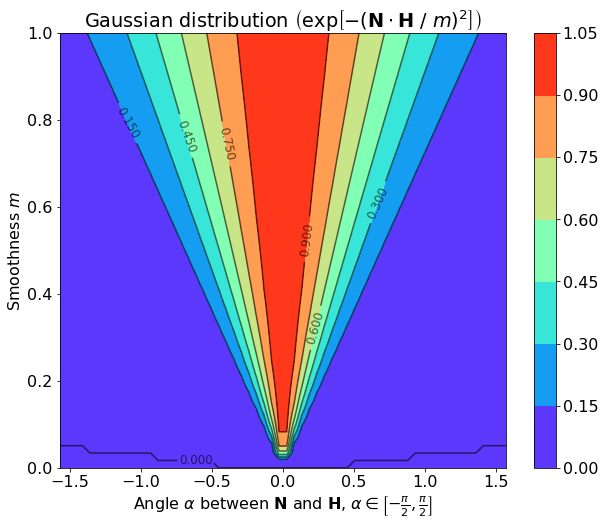

In [5]:
x = np.linspace(-math.pi/2, math.pi/2, 60)
y = np.linspace(0, 1, 60)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X/Y)**2)
plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, colors='black', levels=6, alpha=0.6)
plt.clabel(contours, inline=True, fontsize=12, colors='black')
plt.contourf(X, Y, Z, cmap='rainbow', levels=8)
plt.colorbar()
plt.xlabel('Angle $\\alpha$ between $\\mathbf{N}$ and $\\mathbf{H}$, $\\alpha \\in \\left[-\\frac{\\pi}{2}, \\frac{\\pi}{2}\\right]$')
plt.ylabel('Smoothness $m$')
plt.title('Gaussian distribution $\\left( \\exp\\left[-\\left(\\mathbf{N}\\cdot\\mathbf{H}\\ /\\ m\\right)^2\\right] \\right)$')

## Beckmann

A physically based model of microfacet distribution is the Beckmann distribution.

$$k_{\textrm{spec}} = \dfrac{\exp(-\tan^2(\alpha)\ /\ m^2)}{\pi m^2 \cos^4\ \alpha},\quad \alpha = \arccos(\mathbf{N}\cdot \mathbf{H})$$

where $m$ is the root mean square slope of the surface microfacets (the roughness of the material).

Text(0.5, 1.0, 'Beckman distribution $\\left(\\dfrac{\\exp(-\\tan^2(\\alpha)\\ /\\ m^2)}{\\pi m^2 \\cos^4\\ \\alpha}\\right)$')

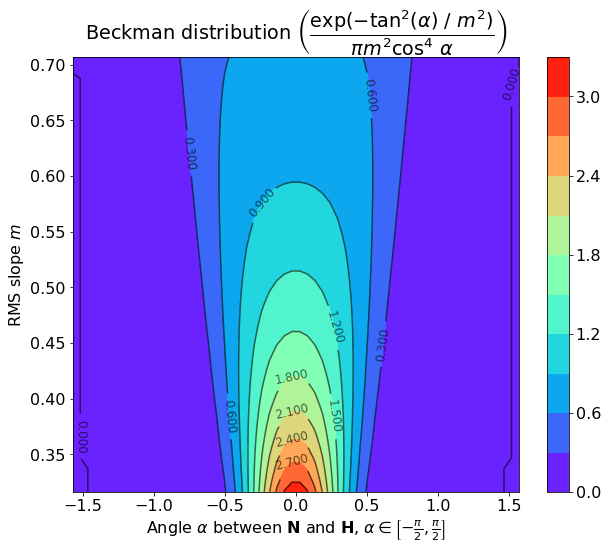

In [6]:
x = np.linspace(-math.pi/2, math.pi/2, 60)
y = np.sqrt(np.linspace(0.1, 0.5, 60))
X, Y = np.meshgrid(x, y)
Z = np.exp(-np.tan(X)**2 / Y**2) / (math.pi * Y**2 * np.cos(X)**4)
plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, colors='black', levels=10, alpha=0.6)
plt.clabel(contours, inline=True, fontsize=12, colors='black')
plt.contourf(X, Y, Z, cmap='rainbow', levels=10)
plt.colorbar()
plt.xlabel('Angle $\\alpha$ between $\\mathbf{N}$ and $\\mathbf{H}$, $\\alpha \\in \\left[-\\frac{\\pi}{2}, \\frac{\\pi}{2}\\right]$')
plt.ylabel('RMS slope $m$')
plt.title('Beckman distribution $\\left(\\dfrac{\\exp(-\\tan^2(\\alpha)\\ /\\ m^2)}{\\pi m^2 \\cos^4\\ \\alpha}\\right)$')

## Anisotropic highlight

![Anisotropic highlight](https://blenderartists.org/uploads/default/abbba04e2267e8efdb9d2bc94de7b13d06e79c3a)

Text(0.5, 1.0, 'Anisotropic highlight')

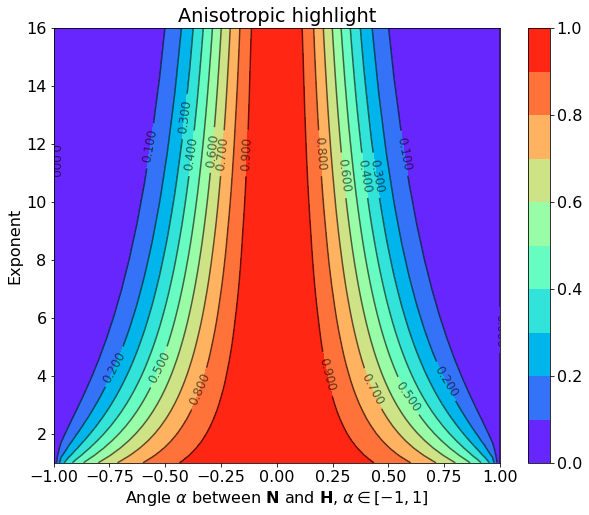

In [14]:
x = np.linspace(-1, 1, 60)
y = np.linspace(1, 16, 60)
X, Y = np.meshgrid(x, y)
sinTH = np.sqrt(1.0-X*X)
Z = sinTH**Y
plt.figure(figsize=(10, 8))
levels = 10
contours = plt.contour(X, Y, Z, colors='black', levels=levels, alpha=0.6)
plt.clabel(contours, inline=True, fontsize=12, colors='black')
plt.contourf(X, Y, Z, cmap='rainbow', levels=levels)
plt.colorbar()
plt.xlabel('Angle $\\alpha$ between $\\mathbf{N}$ and $\\mathbf{H}$, $\\alpha \\in [-1, 1]$')
plt.ylabel('Exponent')
plt.title('Anisotropic highlight')

## Ward's anisotropic specular model

![Ward anisotropic specular model](https://i.stack.imgur.com/8Rcjh.png)

https://en.wikibooks.org/wiki/GLSL_Programming/Unity/Brushed_Metal

## GGX

http://filmicworlds.com/blog/optimizing-ggx-shaders-with-dotlh/